<a href="https://colab.research.google.com/github/UPstartDeveloper/Problem_Solving_Practice/blob/master/analysis/miscellaneous/Warm_Up_Analysis_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 - On PDFs


![Question 1 Image](https://i.postimg.cc/qMCwz3ZY/kash-colab-fun-happy-fun-times-hip-hip-hooray.jpg)

We may **assume** that the number of times Colab crashes in Aakash's classes is normally distributed.

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42)

## Step A: Generate a Sample Distribution

In [ ]:
# A: generate a sample dist
mu, sigma = 2.5, 0.7  # mean and standard devivation
classes_periods = 50  # guessing how many classes Kash has taught
samples = np.random.normal(mu, sigma, classes_periods)

In [ ]:
samples.shape

(50,)

## (Optional) Step B: Show the PDF 

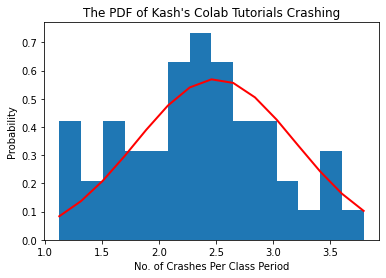

In [ ]:
# the equation for the PDF is borrowed from the NumPy docs: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
bin_edges, bins_probabilites, ignored = plt.hist(samples, 14, density=True)
plt.plot(bins_probabilites, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp(-(bins_probabilites - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')
plt.title("The PDF of Kash's Colab Tutorials Crashing")
plt.ylabel("Probability")
plt.xlabel("No. of Crashes Per Class Period")
plt.show()

## Step C: Compute the CDF

*This the answer btw :) *

In [ ]:
# B: compute the CDF of the distribution, using 2 as the input
probability = np.squeeze(np.sum(np.where(samples < 2, True, False)) / samples.shape) # no. of samples < 2, divided by total count
print(f"The chance of Kash not rage-quitting today is {probability}.")

The chance of Kash not rage-quitting today is 0.28.


## (Optional) Step D: Show the CDF

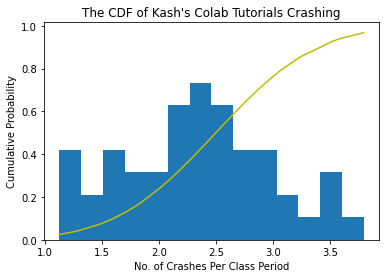

In [ ]:
bin_edges, bins_probabilites, ignored = plt.hist(samples, 14, density=True)
sorted_data = np.sort(samples)
cdf_values = stats.norm.cdf(sorted_data, mu, sigma)
plt.plot(sorted_data, cdf_values, color='y')
plt.title("The CDF of Kash's Colab Tutorials Crashing")
plt.ylabel("Cumulative Probability")
plt.xlabel("No. of Crashes Per Class Period")
plt.show()

# Question 2 - On Hypothesis Testing

## Testing the toxicity of water

Suppose you're trying to measure the Selenium toxicity in your tap water, and obtain the following values for each day:

    
``` 
day	selenium
1	  0.051
2	  0.0505
3	  0.049
4	  0.0516
5	  0.052
6	  0.0508
7	  0.0506
```

The maxiumum level for safe drinking water is 0.05 mg/L -- using this as your alpha, does the selenium tap level exceed the legal limit? 

*Hint 1: you can use a t-test here*

*Hint 2: read this blog on the most common [t-tests in Python, by Ian Gallagher](https://iaingallagher.tumblr.com/post/50980987285/t-tests-in-python).*

In [ ]:
!pip install scipy==1.6.0 # needed for doing left-tailed or right-tailed 1-sample t-tests

In [ ]:
from scipy import stats


# A: define params of test
alpha = 0.05 # question interviewer: what's the significance level? 
safe_limit_for_population = 0.05
sample_values = [0.051, 0.0505, 0.049, 0.0516, 0.052, 0.0508, 0.0506]
null_hypothesis = "The mean level of selenium in our tap water, based on the \
sample, is less than or equal to 0.05 mg/L with 95% confidence (safe to drink)."
alt_hypothesis = "The mean level of selenium in our tap water, based on the \
sample, is more than 0.05 mg/L with 95% confidence (not safe to drink)."

# B: perform the test - use the "alternative" keyword to say it's right-tailed
t, p = stats.ttest_1samp(sample_values, safe_limit_for_population, alternative='greater')

# C: report the results
print(f"The t-statistic is {t}, alpha is {alpha} and the p-value is {p}.")
if p < alpha:  # the data is not significant enough to keep the null hypothesis
  print("Null hypothesis is rejected! Water needs to be examined more.")
else:
  print("Null hypothesis cannot be rejected! Water is safe :)")

The t-statistic is 2.173499949434694, alpha is 0.05 and the p-value is 0.03635505933982123.
Null hypothesis is rejected! Water needs to be examined more.


# Question 3 - Retention Analysis

pass

# Question 4 - Kmeans Clustering

Suppose you have the following [dataset](https://docs.google.com/spreadsheets/u/1/d/1yhXHBSYMuNyFQtQJvhCQeH7qHlwFnZVRNrSagAHVEyw/edit#gid=642376931) which contains (1st tab) a list of items purchased by a given user, (2nd tab) a mapping which maps the item_id to the item name and price, (3rd tab) a matrix that formats data from sheet 1 into a matrix with users in rows and the number of each item_id purchased in columns.

    
With this data, we want to see if we can cluster types of groceries that are typically purchased together. In a previous question, for this data set, we wanted to build plots to look at n=3, 5, and 7. Knowing this, can you create a function that allows us to input the number of clusters and returns a plot with the potential clusters using Principal Component Analysis (PCA)?

    
Answer will be written in Python for premium users.

# Question 5 - Revenue Visualization

*From InterviewQs*:
```
Suppose you are given a data set of Chipotle orders. 
Using these data, can you make a plot showing total revenue per menu item? 

Note, you'll probably want to classify the menu items into categories, or you'll have a very long list.
```

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# plot pretty figures
%matplotlib inline
sns.set_style('darkgrid')

In [6]:
file_path = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
df = pd.read_csv(file_path, sep="\t")

In [28]:
df.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


## Brainstorming

**Straightforward solution**:

ASSUME that each order for the same item, has the same value in the `item_price` column.

*Steps:*
1. Make a histogram of `menu_items` --> number of orders
2. Make another histogram of `menu_items` --> `total_revenue_per_item` (this comes from # orders * `item_price`
3. Plot it in a bar plot


**Condensed solution** - using categories:
Based on [Chipotle's website](https://www.chipotle.com/), I'm going to assume we can classify each of the menu items into one of the following distinct categories - I've listed them below, along with the keywords I'll use to filter the item into that category based on its name:

- Bowls ("bowl")
- Burritos ("burrito")
- Salads ("salad")
- Tacos ("taco")
- Drinks ("drink" "bottled")
- Sides ("chips")
- Miscell (everything else)

Please forgive any inaccuracies here - I am not at all familiar with Mexican cuisine!

*Steps:*
1. Add a new column `category` to the `df`, using the categories listed above.
2. Now, we just map each item to its `category` (by adding a new column to `df`)
3. To get a sum of total revenue per category, we can acculmulate the sum of each individual order that falls in it...
4. And then make a bar plot like before!

In [30]:
def classify_item(item_name: str) -> str:
  """Determines what category a single menu item belongs in.
  
    Uses the name of the item plus keywords associated with each category
    to distinguish.

    Arg:
      item_name(str)

    Returns:
      str: one of {"Bowls", "Burritos", "Salads", "Tacos", "Drinks", "Miscell"}
  """
  # map name words --> category word
  category_keywords = {
      "Bowls": {"bowl"},
      "Burritos": {"burrito"},
      "Salads": {"salad"},
      "Tacos": {"taco"},
      "Sides": {"chips"},
      "Drinks": {"drink", "bottled"}
  }
  # preprocess the name
  item_name = set(item_name.lower().split())
  # categorize
  for category, keywords in category_keywords.items():
    # if it founds - category found!
    if len(item_name.intersection(keywords)) > 0:
      return category
  # if none fit --> "Miscell"
  return "Miscell"

In [31]:
vectorized_categorizer = np.vectorize(classify_item)
categories = vectorized_categorizer(np.array(df["item_name"]))

In [32]:
categories

array(['Sides', 'Miscell', 'Miscell', ..., 'Bowls', 'Bowls', 'Bowls'],
      dtype='<U8')

### Modify Dataframe

In [38]:
# adding column
df["item_category"] = categories

In [37]:
df.item_price.isnull().sum()  # verify there's no Nan!

0

In [50]:
# encode prices as float values
f = lambda price: ''.join((list(price)[1:-1]))
cut_off_dollar_sign = np.vectorize(f)
prices_no_dollar = cut_off_dollar_sign(np.array(df["item_price"]))

In [55]:
df["price_as_float"] = prices_no_dollar.astype(float)

## Solution

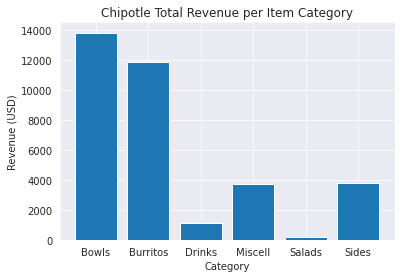

In [64]:
# compute total revenues per category
category_sums = df.groupby("item_category")["price_as_float"].sum()

# Plotting
plt.bar(category_sums.index, category_sums.values)
plt.title("Chipotle Total Revenue per Item Category")
plt.xlabel("Category")
plt.ylabel("Revenue (USD)")
plt.show()